In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
df = pd.read_csv('/kaggle/input/produo-de-petrleo-no-brasil-entre-1941-a-2012/1941_2012.csv')
# Obs: Os dados numéricos estão separados por vírgulas, portanto convém converter os decimais

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (9,11,13,14,15,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [185]:
# Análise
producao = df.rename(columns={'ï»¿Ano':'Ano','MÃªs/Ano':'Mes/Ano',
                               'PoÃ§o':'Poço','InstalaÃ§Ã£o':'Instalação',
                               'ProduÃ§Ã£o de Ãleo (mÂ³)':'Producao'})

por_ano = pd.DataFrame({'Ano':producao['Ano'],'Producao':producao['Producao']})
por_ano['Producao'] = por_ano['Producao'].replace(',','.',regex=True)
por_ano['Ano'] = pd.to_numeric(por_ano['Ano'])
por_ano['Producao'] = pd.to_numeric(por_ano['Producao'])

In [ ]:
por_ano.style

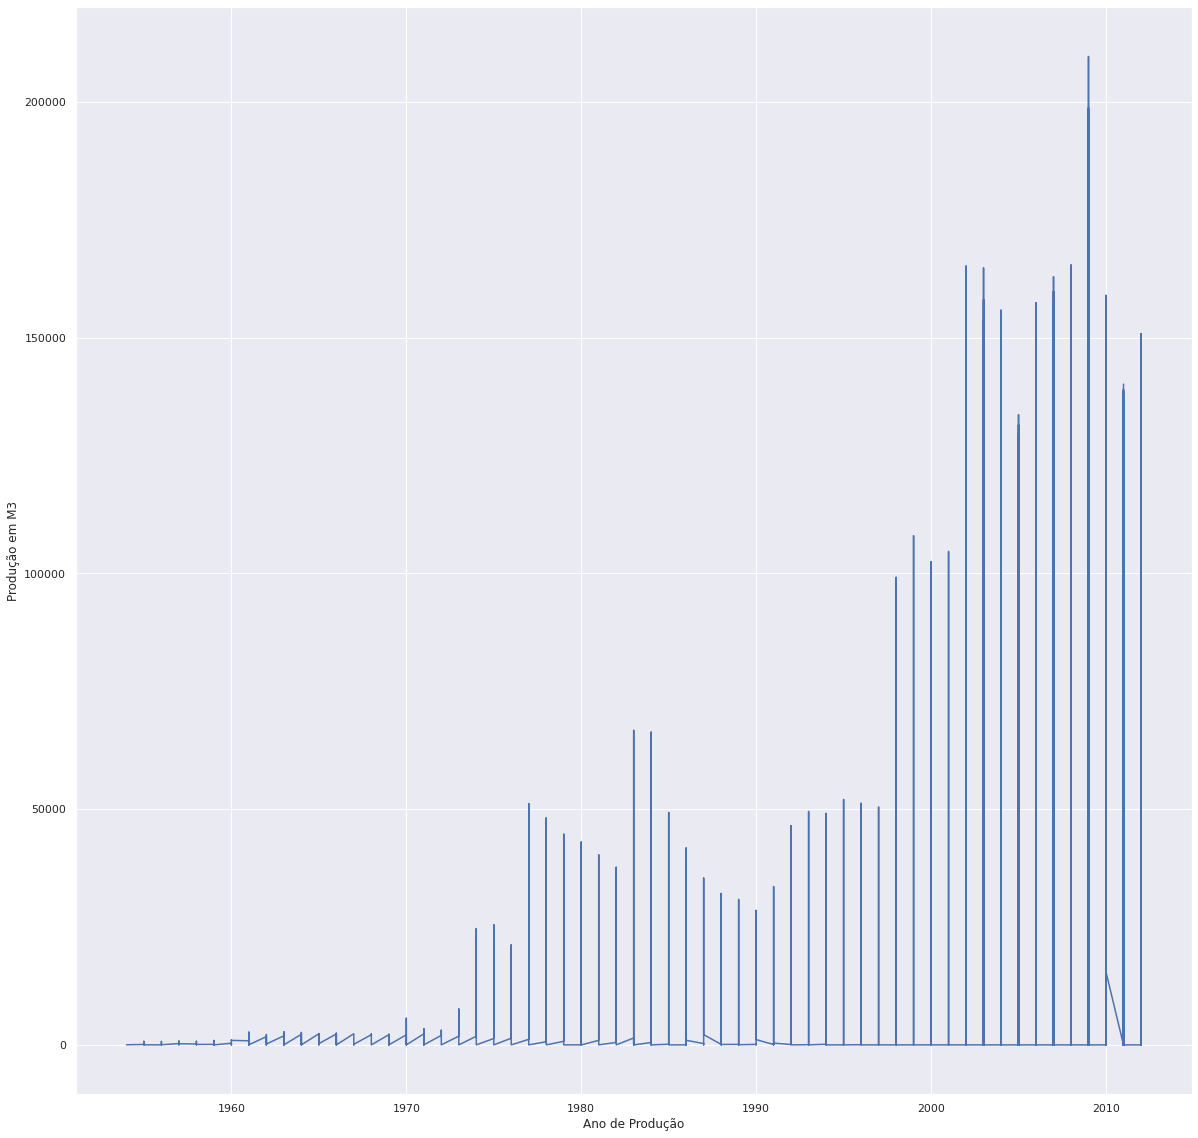

In [275]:
plt.figure(figsize=(20,20))
plt.plot(por_ano['Ano'],por_ano['Producao'])
plt.xlabel('Ano de Produção')
plt.ylabel('Produção em M3')
plt.show()

Os os dados acima mostram, como esperado, que a produção de petróleo no Brasil tem um crescimento ao longo dos anos tendo um salto na década de 2000-2010

In [5]:
# Primeira Questão: Quanto foi a produção total em toda a série histórica?

total = por_ano['Producao']
producao_41_12 = np.sum(total)
print(f'Com base nos dados, a produção foi de {round(producao_41_12,2)} m3 de Petróleo entre 1941 a 2012')

Com base nos dados, a produção foi de 1637547514.4 m3 de Petróleo entre 1941 a 2012


In [6]:
# Segunda Questão: Qual foi a produção média de Petróleo em toda a série histórica?

media_total = np.mean(total)
print(f'Com base nos dados, a produção média foi de {round(media_total,2)} m3 de Petróleo entre 1941 a 2012')

Com base nos dados, a produção média foi de 4587.2 m3 de Petróleo entre 1941 a 2012


In [7]:
# Terceira Questão: Considerando que um barril de Petróleo possui aproximadamente 158,98 litros, ou 0,15898 metro cúbico (m3)
# de petróleo, determine o volume total de barris produzidos em média 
# Fonte: https://comunicabaciadesantos.petrobras.com.br/glossario/b

barris = media_total * 0.15898
barris

729.2729152689966

A análise anterior mostra que a produção média anual de óleo na série histórica foi de aproximadamente 729 barris o que não representa a realidade uma vez que o não se considera a variação da produção ao longo do tempo.

In [9]:
# Considerando que a Média de barris foi abaixo da ordem de grandeza que é a produção da década de 10, qual o desvio padrão
# de toda produção na média histórica

variacao = round(np.std(total),2)
variacao

11494.77

In [206]:
# Vamos avaliar a dispersão dos pontos em relação a média
# Vamos agrupar os dados em um range de valores de 40
anos = list(pd.array(por_ano['Ano']))
producao = list(pd.array(por_ano['Producao']))

decada_40_70 = []
decada_80_90 =[]
decada_00_10 = []

for ano in range(0,len(anos)):
    if anos[ano] in [x for x in range(1941,1981,1)]:
        decada_40_70.append(producao[ano])
    elif anos[ano] in [x for x in range(1981,2001,1)]:
        decada_80_90.append(producao[ano])
    elif anos[ano] in [x for x in range(2001,2013,1)]:
        decada_00_10.append(producao[ano])


In [220]:
# Conferindo se a distribuição dos dados foi feita corretamente 
print(len(anos)- (len(decada_40_70)+len(decada_80_90)+len(decada_00_10)))

0


In [236]:
# Fazendo um novo Dataframe com os dados Agrupados

decada_40_70 =pd.DataFrame(decada_40_70)
decada_80_90 =pd.DataFrame(decada_80_90)
decada_00_10 =pd.DataFrame(decada_00_10)

In [259]:
# Primeira Questão: Quanto foi a produção em total de óleo em m3?

Total = float(decada_40_70.sum() + decada_80_90.sum() + decada_00_10.sum())
print(f'Produção total de óleo em m3 foi de aproximadamente {round(Total,2)} m3')

Produção total de óleo em m3 foi de aproximadamente 1637547514.4 m3


In [262]:
# Segunda Questão: Quanto foi a produção em total de óleo nos 3 agrupamentos?

total_decada = {'1940 a 1970':float(decada_40_70.sum()),
                '1980 a 1990':float(decada_80_90.sum()),
                '2000 até o ano de 2012':round(float(decada_00_10.sum()),2)}
print('em m3:',total_decada)

em m3: {'1940 a 1970': 25248456.8, '1980 a 1990': 544785969.9, '2000 até o ano de 2012': 1067513087.7}


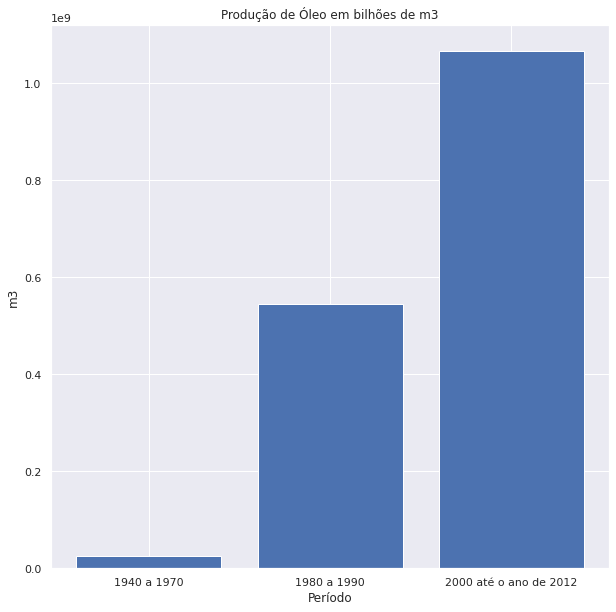

In [289]:
# Crie o gráfico de barras comparando o crescimento de produção de óleo ao longo das décadas
x = total_decada.keys()
y = total_decada.values()
plt.figure(figsize = (10,10))
plt.xlabel('Período')
plt.ylabel('m3')
plt.bar(x,y)
plt.title('Produção de Óleo em bilhões de m3')
plt.show()

In [302]:
# Calcule a representação percentual de cada decada em relação ao todo

total_decada_percentual = {'1940 a 1970':round(100*(float(decada_40_70.sum()/Total)),2),
                '1980 a 1990':round(100*float(decada_80_90.sum()/Total),2),
                '2000 até o ano de 2012':round(100*float(decada_00_10.sum())/Total,2)}

print(total_decada_percentual)

{'1940 a 1970': 1.54, '1980 a 1990': 33.27, '2000 até o ano de 2012': 65.19}


In [313]:
# Calcule a produção média e o desvio de produção de óleo em cada década e plote em um gráfico de linhas:

media_primeira = round(float(decada_40_70.mean()),2)
media_segunda = round(float(decada_80_90.mean()),2)
media_terceira = round(float(decada_00_10.mean()),2)
print(f'Na primeira série a produção foi de {media_primeira}, na segunda {media_segunda} e na ultima {media_terceira} em m3')

desvio_primeira = round(float(decada_40_70.std()),2)
desvio_segunda = round(float(decada_80_90.std()),2)
desvio_terceira = round(float(decada_00_10.std()),2)
print(f'Na primeira série a produção tem uma variação de {desvio_primeira}, na segunda {desvio_segunda} e na ultima {desvio_terceira} em m3')

Na primeira série a produção foi de 381.52, na segunda 3169.9 e na ultima 8975.15 em m3
Na primeira série a produção tem uma variação de 1588.37, na segunda 6684.57 e na ultima 17280.1 em m3


Apesar da estratificação dos dados apresentar que a média por período não é representativa, o comportamento mostra como esperando o comportamento de crescimento da produção de óleo ao longo das décadas.